In [2]:
import numpy as np 
import torch 
import matplotlib.pyplot as plt
from torch.cuda import random

import torch.nn as nn 
import torch.optim as optim

import regression

In [3]:
w_st        = torch.Tensor([-8.,-4.,2.,1.])
x_rang      = torch.Tensor([-3.,2.])
sig         = 0.5
num_samples = 100
seed_train  = 0
seed_val    = 1

X_train, y_train = regression.create_dataset(w_star=w_st,x_range=x_rang,sample_size=num_samples,sigma=sig,seed=seed_train)
X_val, y_val = regression.create_dataset(w_star=w_st,x_range=x_rang,sample_size=num_samples,sigma=sig,seed=seed_val)

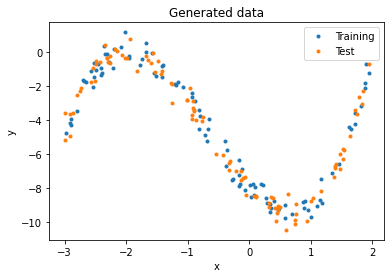

In [4]:
plt.plot(X_train[:,1],y_train,'.',label= 'Training')
plt.plot(X_val[:,1],y_val,'.',label= 'Test')
plt.legend()
plt.title('Generated data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Step 0: train loss: 33.25267028808594
Step 0: val loss: 31.347246170043945
Step 1: train loss: 31.3008975982666
Step 1: val loss: 29.882726669311523
Step 2: train loss: 29.796567916870117
Step 2: val loss: 28.477405548095703
Step 3: train loss: 28.598388671875
Step 3: val loss: 27.48324966430664
Step 4: train loss: 27.6136531829834
Step 4: val loss: 26.514341354370117
Step 5: train loss: 26.780977249145508
Step 5: val loss: 25.762697219848633
Step 6: train loss: 26.059297561645508
Step 6: val loss: 25.030893325805664
Step 7: train loss: 25.420732498168945
Step 7: val loss: 24.42031478881836
Step 8: train loss: 24.8460636138916
Step 8: val loss: 23.829980850219727
Step 9: train loss: 24.321760177612305
Step 9: val loss: 23.31151580810547
Step 10: train loss: 23.83810043334961
Step 10: val loss: 22.813404083251953
Step 11: train loss: 23.38794708251953
Step 11: val loss: 22.360715866088867
Step 12: train loss: 22.96588897705078
Step 12: val loss: 21.927274703979492
Step 13: train loss: 2

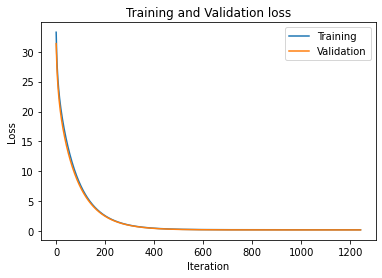

Final model weights: Parameter containing:
tensor([[-7.8553, -4.0753,  1.9758,  1.0087]], requires_grad=True)


In [7]:
torch.manual_seed(10091995)
model_final = regression.poly_regr(X_train,y_train,X_val=X_val,y_val=y_val,learning_rate=0.01,num_steps=1243)
plt.plot(model_final[1],label = 'Training')
plt.plot(model_final[2],label= 'Validation')
plt.title('Training and Validation loss')
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.legend()
plt.show()

print('Final model weights:',model_final[0])

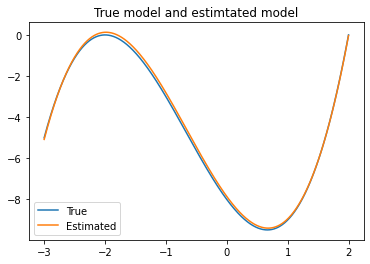

In [9]:
def model_evaluation(x,weights):
    weights = weights.detach().numpy()
    out = (weights[0][-1]*x**3) + (weights[0][-2]*x**2)+(weights[0][-3]*x)+(weights[0][-4])
    return out

xx = np.linspace(-3,2,1000)
y_true=regression.p(xx)
y_estim = model_evaluation(x=xx,weights = model_final[0])
plt.plot(xx,y_true,label = 'True')
plt.plot(xx,y_estim,label='Estimated')
#plt.plot(X_train[:,1],y_train,'.')
plt.title('True model and estimtated model')
plt.legend()
plt.show()